In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [10]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data available in link has been imported successfully")

s_data.head(10)

Data available in link has been imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
df.shape

(25, 2)

In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for Null Values in a dataset is crucial as it can heavily affect the performance of a model.

In [15]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

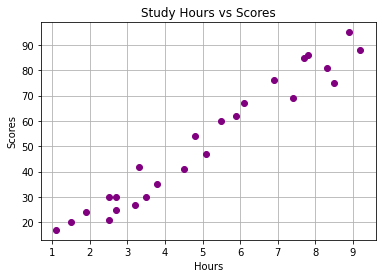

In [16]:
plt.figure()
plt.plot(df['Hours'].values, df['Scores'].values, 'o', color='purple')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours vs Scores')
plt.show()

By looking at the graph we can infer that our data has a high correlation making it a perfect candidate for implementing linear regression.


Let us divide our dataset into dependent and independent variables. 'y' is our target (or dependent) variable and 'X' is our independent variable.

Text(0.5, 0, 'Hours')

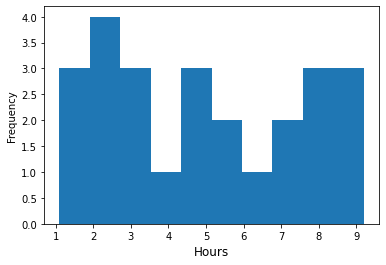

In [31]:
plt.figure(figsize =(6,4))
s_data["Hours"].plot.hist(bins=10)
plt.xlabel("Hours",fontsize=12)

Text(0.5, 0, 'Scores')

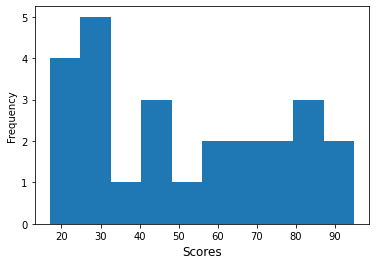

In [32]:
df["Scores"].plot.hist(bins=10)
plt.xlabel("Scores",fontsize=12)

In [35]:
df.median()

Hours      4.8
Scores    47.0
dtype: float64

In [36]:
X = np.array(df["Hours"])
y = np.array(df["Scores"])

In [37]:
X.shape, y.shape


((25,), (25,))

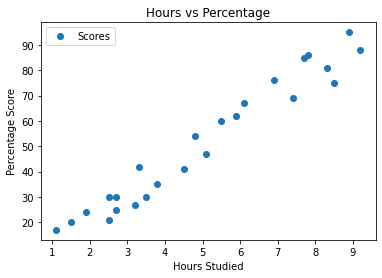

In [38]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [17]:
X = df.iloc[:, :1].values
y = df.iloc[:,-1:].values

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


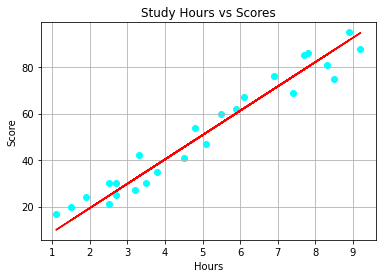

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)   # Training

line = model.coef_*X+model.intercept_  # Equation of line --> y = mx + c

# Plotting the data with the regression line

plt.scatter(X, y, color = 'cyan')
plt.plot(X, line, color = 'red')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Study Hours vs Scores')
plt.show()

In [24]:
regr_predict = model.predict(X_test)

Predicting the score for 9.25 hours of studying -

In [27]:

hours =  [[9.25]]
result = model.predict(hours)
print("No. of Hours = {}".format(hours))
print("Score Predicted = {}".format(result[0]))

No. of Hours = [[9.25]]
Score Predicted = [95.22829438]


# Metrics¶
We shall now evaluate the performance of our model.



In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, regr_predict))


Mean Absolute Error: 7.882398086270432


In [28]:
df.isnull().transpose()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Scores,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
s_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [30]:
s_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
from sklearn.linear_model import LinearRegression   #Importing LinearRegression from sklearn

#Making the instance of LinearRegression by calling LinearRegression() keeping parameters as default.
regressor = LinearRegression()  

# By fitting the data,the model will be trained according to the relation the independent and dependent variables are having with each other
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


In [41]:

x = float(input("Enter the number of hours, a student study for the exam   : "))
print("Student obtain {} marks(approx) by studying {} Hours".format(regressor.predict([[x]]),x))

Enter the number of hours, a student study for the exam   : 5.3
Student obtain [[53.90691662]] marks(approx) by studying 5.3 Hours
